# Equivalent circuit models demonstrator

This notebook includes examples of how different equivalent circuit models (ECMs) contribute to different electrochemical impedance spectroscopy (EIS) spectra, with qualitative demonstrations of how changing the impedance of one component in a Voigt element changes the shape and distribution of points in an EIS semi-circle. 

In [4]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

from ipywidgets import interact, IntSlider, FloatSlider
from matplotlib.ticker import MultipleLocator

## Defining impedance elements
A constant phase element (CPE) is similar to a capacitor, but with a phase change $\neq \frac{\pi}{2}$:

$Z_{CPE} = \frac{-1}{Q (2 \pi f)^{\alpha}}$

where $0 \leq \alpha \leq 1$, and $\alpha=1$ for an ideal capacitor

In [2]:
def Z_R(R, freq):
    return np.full((freq.shape), R)

def Z_CPE(Q, alpha, freq):
    return np.array([complex(0, -1/(Q*(2*np.pi*f)**alpha))  
                     for f in freq])

def Z_parallel(R, Q, alpha, freq):
    real = Z_R(R, freq)
    imag = Z_CPE(Q, alpha, freq)
    return 1/((1/real)+(1/imag))

In this work, the range of frequencies used experimentally was between 60 mHz and 1 MHz

In [3]:
freq = np.logspace(np.log10(60e-3), 6, 50)

## Bode plots

Plot to show the frequency dependence of the maximum reactance value for a constant value of resistance and $\alpha$: Increasing reactance corresponds to lower $f_{max}$

<IPython.core.display.Javascript object>


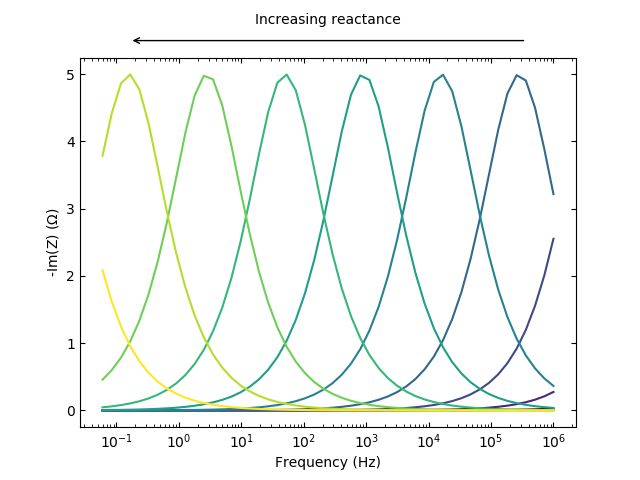

In [6]:
fig, ax = plt.subplots()
C = np.logspace(-9, 0, 10)
R = 10
a = 0.8
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, C.shape[0])])
ax.set_xscale("log")

for c in C:
    ax.plot(freq, -np.imag(Z_parallel(R, c, a, freq)), label=c)

trans = ax.get_yaxis_transform()
ax.annotate("Increasing reactance", xy=(0.5, 5.75), xycoords=trans, ha="center");
ax.annotate("", xytext=(0.9, 5.5), xy=(0.1, 5.5), xycoords=trans, arrowprops={"arrowstyle": "->"});
ax.tick_params(which="both", tickdir="in", top=True, right=True);
ax.set_xlabel("Frequency (Hz)");
ax.set_ylabel("-Im(Z) ($\Omega$)");

Plot to show the frequency dependence of the resistive component of the impedance for a constant reactive element:

<IPython.core.display.Javascript object>


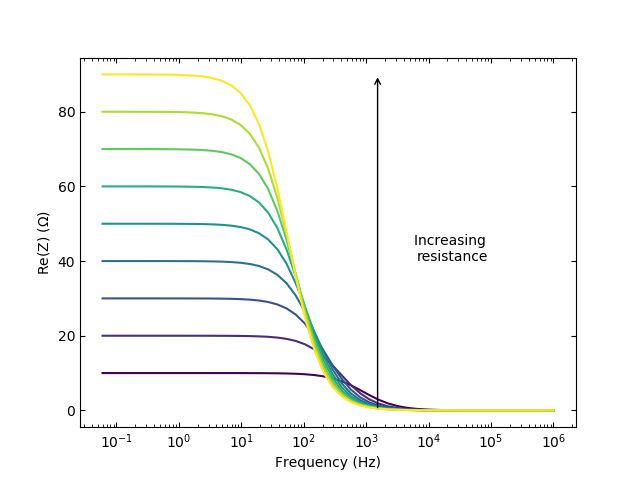

Text(0, 0.5, 'Re(Z) ($\\Omega$)')

In [7]:
fig, ax = plt.subplots()
R = np.arange(10, 100, 10)
C = 1e-4
a = 0.8
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, R.shape[0])])
ax.set_xscale("log")
for r in R:
    ax.plot(freq, np.real(Z_parallel(r, C, a, freq)))
    
trans = ax.get_yaxis_transform()
ax.annotate("Increasing \nresistance", xy=(0.75, 40), xycoords=trans, ha="center")
ax.annotate("", xytext=(0.6, 0), xy=(0.6, 90), xycoords=trans, arrowprops={"arrowstyle": "->"})
ax.tick_params(which="both", tickdir="in", top=True, right=True)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Re(Z) ($\Omega$)")

Plot to show the effect on the resistive component of impedance of changing $\alpha$ while the capacitive and resistive elements are held constant:

<IPython.core.display.Javascript object>


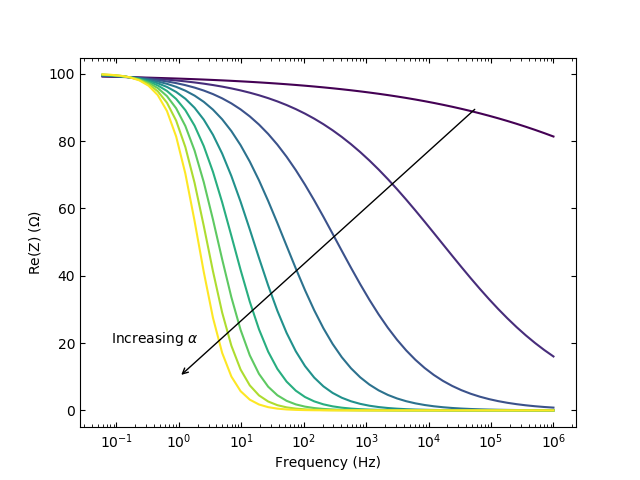

Text(0, 0.5, 'Re(Z) ($\\Omega$)')

In [14]:
fig, ax = plt.subplots()
R = 100
C = 1e-3
alpha = np.arange(0.1, 1, 0.1)
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, alpha.shape[0])])
ax.set_xscale("log")

for a in alpha:
    ax.plot(freq, np.real(Z_parallel(R, C, a, freq)))
    
trans = ax.get_yaxis_transform()
ax.annotate(r"Increasing $\alpha$", xy=(0.15, 20), xycoords=trans, ha="center")
ax.annotate("", xytext=(0.8, 90), xy=(0.2, 10), xycoords=trans, arrowprops={"arrowstyle": "->"})
ax.tick_params(which="both", tickdir="in", top=True, right=True)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Re(Z) ($\Omega$)")

Plot to show the effect on the reactive component of impedance of changing $\alpha$ while the capacitive and resistive elements are held constant:

<IPython.core.display.Javascript object>


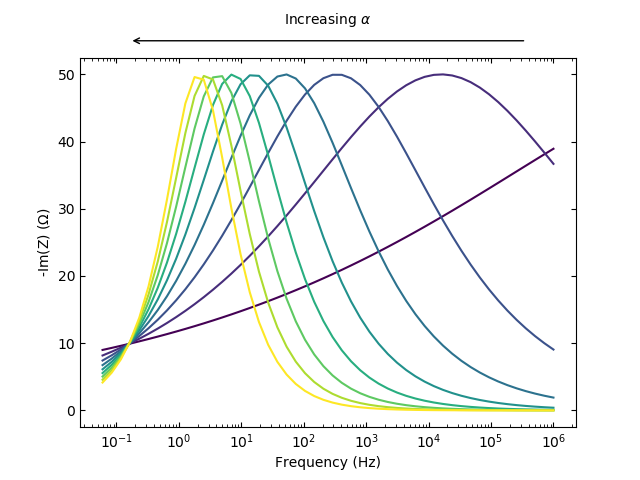

Text(0, 0.5, '-Im(Z) ($\\Omega$)')

In [15]:
fig, ax = plt.subplots()
R = 100
C = 1e-3
alpha = np.arange(0.1, 1, 0.1)
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, alpha.shape[0])])
ax.set_xscale("log")

for a in alpha:
    ax.plot(freq, -np.imag(Z_parallel(R, C, a, freq)))
    
trans = ax.get_yaxis_transform()
ax.annotate(r"Increasing $\alpha$", xy=(0.5, 57.5), xycoords=trans, ha="center")
ax.annotate("", xytext=(0.9, 55), xy=(0.1, 55), xycoords=trans, arrowprops={"arrowstyle": "->"})
ax.tick_params(which="both", tickdir="in", top=True, right=True)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("-Im(Z) ($\Omega$)")

## Nyquist plots
Plot to show to distribution of impedance points for varying capacitive element, with constant resistive element and constant $\alpha$

The semicircles for each reactance value are offset in the y direction for clarity

<IPython.core.display.Javascript object>


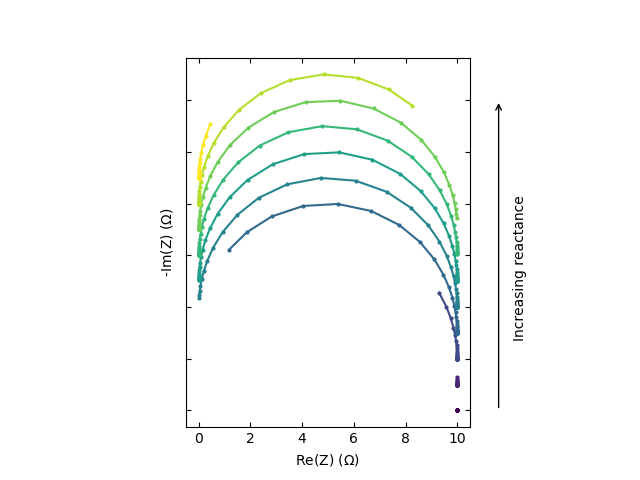

[]

In [12]:
fig, ax = plt.subplots()
C = np.logspace(-9, 0, 10)
R = 10
a = 0.8
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, C.shape[0])])

offset = 1
for nc, c in enumerate(C):
    ax.plot(np.real(Z_parallel(R, c, a, freq)), -np.imag(Z_parallel(R, c, a, freq))+offset*nc,
            "-o", ms=2, label=c)

trans = ax.get_yaxis_transform()
ax.annotate("Increasing reactance", xy=(1.15, 5.5), xycoords=trans, rotation=90, va="center")
ax.annotate("", xytext=(1.1, 0), xy=(1.1, 12), xycoords=trans, arrowprops={"arrowstyle": "->"})
ax.tick_params(which="both", tickdir="in", top=True, right=True)
ax.set_xlabel("Re(Z) ($\Omega$)")
ax.set_ylabel("-Im(Z) ($\Omega$)")
ax.set_aspect("equal")
ax.set_yticklabels([]);

Plot to show the effect of increasing the resistive element while the capacitive element and $\alpha$ are held constant:

<IPython.core.display.Javascript object>


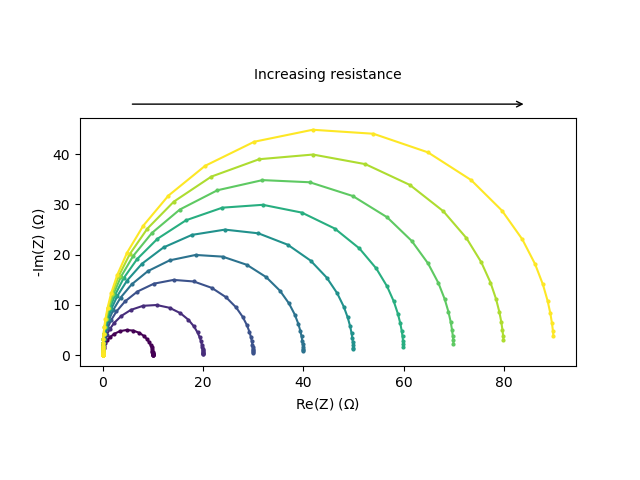

In [13]:
fig, ax = plt.subplots()
R = np.arange(10, 100, 10)
C = 1e-3
a = 0.8
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, R.shape[0])])
# ax.set_xscale("log")

for r in R:
    ax.plot(np.real(Z_parallel(r, C, a, freq)),
            -np.imag(Z_parallel(r, C, a, freq)),
            "-o", ms=2)
    
trans = ax.get_yaxis_transform()
ax.annotate("Increasing resistance", xy=(0.5, 55), xycoords=trans, ha="center")
ax.annotate("", xytext=(0.1, 50), xy=(0.9, 50), xycoords=trans, arrowprops={"arrowstyle": "->"})
# ax.tick_params(which="both", tickdir="in", top=True, right=True)
ax.set_xlabel("Re(Z) ($\Omega$)")
ax.set_ylabel("-Im(Z) ($\Omega$)")
ax.set_aspect("equal")

Plot to show the effect of increasing the value of $\alpha$ while the capacitive and resistive elements are held constant:

<IPython.core.display.Javascript object>


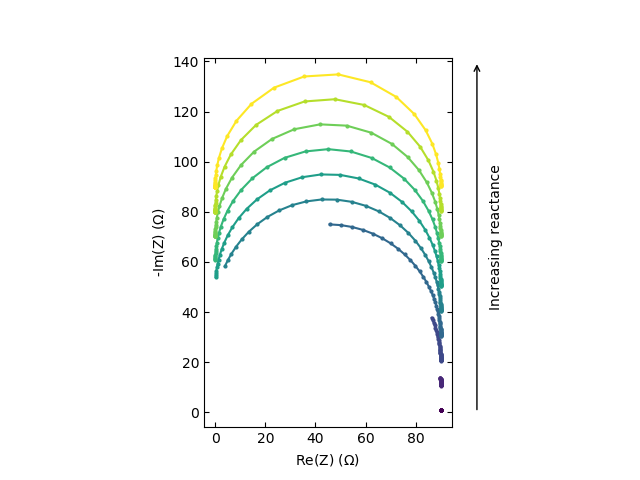

In [28]:
fig, ax = plt.subplots()
R = 1
C = 1e-4
alpha = np.arange(0, 1, 0.1)
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, alpha.shape[0])])
# ax.set_xscale("log")
offset = 10
for na, a in enumerate(alpha):
    ax.plot(np.real(Z_parallel(r, C, a, freq)),
            -np.imag(Z_parallel(r, C, a, freq))+na*offset,
            "-o", ms=2)
    
trans = ax.get_yaxis_transform()
ax.annotate("Increasing reactance", xy=(1.15, 70), xycoords=trans, rotation=90, va="center")
ax.annotate("", xytext=(1.1, 0), xy=(1.1, 140), xycoords=trans, arrowprops={"arrowstyle": "->"})
ax.tick_params(which="both", tickdir="in", top=True, right=True)
ax.set_xlabel("Re(Z) ($\Omega$)")
ax.set_ylabel("-Im(Z) ($\Omega$)")
ax.set_aspect("equal")

## Interactive plot for two Voigt elements in series

<IPython.core.display.Javascript object>


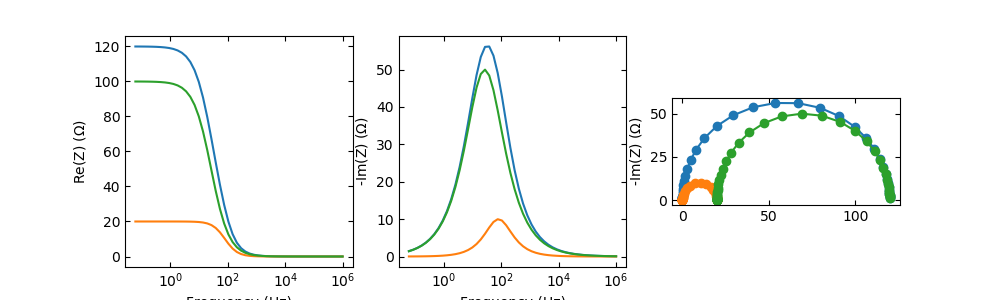

interactive(children=(IntSlider(value=20, description='R1'), IntSlider(value=100, description='C1', max=1000, …

<function __main__.update(R1, C1, alpha1, R2, C2, alpha2)>

In [30]:
f, (axes) = plt.subplots(1, 3, figsize=(10, 3))
R1 = 10
C1 = 1e-6
alpha1 = 1
R2 = 10
C2 = 1e-6
alpha2 = 1

Z1 = Z_parallel(R1, C1, alpha1, freq)
Z2 = Z_parallel(R2, C2, alpha2, freq)

for ax in axes:
    ax.tick_params(which="both", tickdir="in", top=True, right=True)

def update(R1, C1, alpha1,
           R2, C2, alpha2):
    Z1 = Z_parallel(R1, C1*1e-6, alpha1, freq)
    Z2 = Z_parallel(R2, C2*1e-6, alpha2, freq)
    
    axes[0].cla()
    axes[0].plot(freq, np.real(Z1+Z2))
    axes[0].plot(freq, np.real(Z1))
    axes[0].plot(freq, np.real(Z2))
    axes[0].set_xscale("log")
    axes[0].set_xlabel("Frequency (Hz)")
    axes[0].set_ylabel("Re(Z) ($\Omega$)")
    
    axes[1].cla()
    axes[1].plot(freq, -np.imag(Z1+Z2))
    axes[1].plot(freq, -np.imag(Z1))
    axes[1].plot(freq, -np.imag(Z2))
    axes[1].set_xscale("log")
    axes[1].set_xlabel("Frequency (Hz)")
    axes[1].set_ylabel("-Im(Z) ($\Omega$)")
    
    axes[2].cla()
    axes[2].set_aspect("equal")
    axes[2].plot(np.real(Z1+Z2), -np.imag(Z1+Z2), "-o")
    axes[2].plot(np.real(Z1), -np.imag(Z1), "-o")
    axes[2].plot(np.real(Z2+Z1[0]), -np.imag(Z2), "-o")
    axes[2].set_ylabel("Re(Z) ($\Omega$)")
    axes[2].set_ylabel("-Im(Z) ($\Omega$)")    
    
interact(update, R1=IntSlider(min=0, max=100, step=1, value=20),
                 C1=IntSlider(min=0, max=1000, step=10, value=100),
                 alpha1=FloatSlider(min=0, max=1, step=0.1, value=0.8),
        R2=IntSlider(min=0, max=100, step=1, value=50),
                 C2=IntSlider(min=0, max=1000, step=10, value=840),
                 alpha2=FloatSlider(min=0, max=1, step=0.1, value=1))